In [1]:
# Install YOLOv8 from the ultralytics library
!pip install ultralytics

# Install Roboflow to download the dataset
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.4/898.4 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cjU1zRFgpb0vH56NFSUF")
project = rf.workspace("mohamed-traore-2ekkp").project("taco-trash-annotations-in-context")
version = project.version(16)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TACO:-Trash-Annotations-in-Context-Dataset-16 in yolov8:: 100%|██████████| 7204/7204 [00:01<00:00, 4520.95it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from ultralytics import YOLO

# Step 1: Load a pre-trained YOLOv8 model (choose 'n', 's', 'm', 'l', or 'x' for different sizes)
model = YOLO("yolov8n.pt")  # yolov8n = nano, yolov8s = small, yolov8m = medium, etc.

# Step 2: Train the model
model.train(
    data=f"{dataset.location}/data.yaml",  # Path to the downloaded dataset's data.yaml
    epochs=50,                             # Number of epochs to train
    imgsz=640,                             # Image size
    batch=16,                              # Batch size
    workers=2                              # Number of workers (adjust based on your environment)
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 179MB/s]


Ultralytics 8.3.43 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/TACO:-Trash-Annotations-in-Context-Dataset-16/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 114MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 267MB/s]


AMP: checks passed ✅


train: Scanning /content/TACO:-Trash-Annotations-in-Context-Dataset-16/train/labels... 3146 images, 23 backgrounds, 0 corrupt: 100%|██████████| 3146/3146 [00:02<00:00, 1480.46it/s]


train: New cache created: /content/TACO:-Trash-Annotations-in-Context-Dataset-16/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/TACO:-Trash-Annotations-in-Context-Dataset-16/valid/labels... 299 images, 0 backgrounds, 0 corrupt: 100%|██████████| 299/299 [00:00<00:00, 802.27it/s]

val: New cache created: /content/TACO:-Trash-Annotations-in-Context-Dataset-16/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.32G      1.391      2.256      1.286         43        640: 100%|██████████| 197/197 [01:17<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]

                   all        299       1014       0.44      0.309      0.292      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.19G      1.563      1.961      1.395         52        640: 100%|██████████| 197/197 [01:10<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        299       1014      0.417      0.239       0.22      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.28G      1.617      1.926      1.437         55        640: 100%|██████████| 197/197 [01:13<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]


                   all        299       1014      0.391      0.301      0.252      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.27G      1.583      1.834      1.426         55        640: 100%|██████████| 197/197 [01:11<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.92it/s]

                   all        299       1014      0.467      0.331      0.305      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.3G      1.557      1.791      1.395         38        640: 100%|██████████| 197/197 [01:14<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]

                   all        299       1014      0.536      0.341      0.341      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.16G      1.494      1.721      1.366         65        640: 100%|██████████| 197/197 [01:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]

                   all        299       1014      0.577      0.363      0.378      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.22G      1.481      1.675      1.357         53        640: 100%|██████████| 197/197 [01:14<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

                   all        299       1014      0.483       0.35       0.34      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.3G      1.438      1.625      1.337         50        640: 100%|██████████| 197/197 [01:10<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]

                   all        299       1014      0.576       0.37      0.385      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.42G      1.415      1.575      1.311         19        640: 100%|██████████| 197/197 [01:11<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]

                   all        299       1014       0.55      0.356      0.373      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.41G      1.412      1.572       1.31         85        640: 100%|██████████| 197/197 [01:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]


                   all        299       1014      0.572      0.397      0.402      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.22G      1.387      1.546      1.298         43        640: 100%|██████████| 197/197 [01:13<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]

                   all        299       1014      0.635      0.374       0.41      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.5G      1.357      1.508      1.282         33        640: 100%|██████████| 197/197 [01:10<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]

                   all        299       1014      0.598      0.404      0.419      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.4G      1.361      1.505      1.288         72        640: 100%|██████████| 197/197 [01:12<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]

                   all        299       1014       0.66      0.361      0.403      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.24G      1.339       1.46      1.267         37        640: 100%|██████████| 197/197 [01:10<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.37it/s]


                   all        299       1014      0.632      0.384      0.419      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.19G      1.329      1.437      1.266         27        640: 100%|██████████| 197/197 [01:10<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        299       1014      0.644      0.376      0.417      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.28G      1.316       1.45      1.261         41        640: 100%|██████████| 197/197 [01:10<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.35it/s]

                   all        299       1014      0.608      0.409      0.423       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.29G      1.305      1.402      1.244         26        640: 100%|██████████| 197/197 [01:12<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]

                   all        299       1014      0.583      0.419      0.434      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.28G      1.281      1.381       1.24         60        640: 100%|██████████| 197/197 [01:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]

                   all        299       1014       0.59      0.403      0.416      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.28G      1.274      1.358      1.232         28        640: 100%|██████████| 197/197 [01:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.22it/s]

                   all        299       1014      0.684      0.395      0.448      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.28G      1.284      1.385      1.231         27        640: 100%|██████████| 197/197 [01:13<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]


                   all        299       1014      0.609      0.401      0.437      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.28G      1.269      1.337      1.228         64        640: 100%|██████████| 197/197 [01:12<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        299       1014      0.673      0.393      0.445      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.27G      1.255      1.314      1.224         55        640: 100%|██████████| 197/197 [01:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


                   all        299       1014      0.676        0.4       0.44        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.2G      1.245      1.292      1.203         57        640: 100%|██████████| 197/197 [01:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]


                   all        299       1014      0.622      0.398      0.431      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.25G      1.236      1.291      1.212         51        640: 100%|██████████| 197/197 [01:11<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        299       1014      0.676      0.401      0.457      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.29G      1.222      1.286      1.206         30        640: 100%|██████████| 197/197 [01:12<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.55it/s]

                   all        299       1014      0.654       0.41      0.451      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.28G      1.212      1.246      1.198         43        640: 100%|██████████| 197/197 [01:12<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]

                   all        299       1014      0.642      0.421       0.46      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.32G       1.22      1.255      1.187         30        640: 100%|██████████| 197/197 [01:14<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.23it/s]


                   all        299       1014      0.656      0.428      0.468      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.29G      1.202      1.219      1.183         24        640: 100%|██████████| 197/197 [01:13<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        299       1014      0.638      0.412      0.466      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.19G      1.184      1.203      1.179         31        640: 100%|██████████| 197/197 [01:14<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]


                   all        299       1014      0.635      0.425      0.466      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.28G      1.181      1.195      1.173         61        640: 100%|██████████| 197/197 [01:13<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

                   all        299       1014      0.713      0.405      0.474      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.29G       1.17      1.185       1.17         40        640: 100%|██████████| 197/197 [01:13<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]

                   all        299       1014      0.614      0.443      0.473      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.39G      1.163      1.171      1.169         75        640: 100%|██████████| 197/197 [01:12<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        299       1014      0.675      0.407      0.458      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.2G       1.14      1.153      1.156         32        640: 100%|██████████| 197/197 [01:12<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]

                   all        299       1014      0.658      0.435      0.479      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.38G       1.17      1.162      1.162         47        640: 100%|██████████| 197/197 [01:11<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        299       1014      0.649      0.447      0.488      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.32G      1.147      1.129       1.15         63        640: 100%|██████████| 197/197 [01:13<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        299       1014      0.699      0.415      0.476      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.21G      1.149      1.141      1.155         83        640: 100%|██████████| 197/197 [01:14<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]

                   all        299       1014      0.672      0.444      0.488       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.27G      1.142      1.109      1.157         36        640: 100%|██████████| 197/197 [01:15<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]

                   all        299       1014      0.688       0.43      0.482      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.53G      1.117       1.09      1.141         19        640: 100%|██████████| 197/197 [01:11<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.35it/s]


                   all        299       1014      0.671      0.438      0.484      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.3G      1.116      1.078      1.138         53        640: 100%|██████████| 197/197 [01:13<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        299       1014      0.725      0.416      0.482      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.33G      1.124      1.075      1.138         58        640: 100%|██████████| 197/197 [01:12<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]

                   all        299       1014      0.644      0.457      0.492      0.343


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.32G      1.045      1.015      1.084         22        640: 100%|██████████| 197/197 [01:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]

                   all        299       1014      0.697      0.427      0.491      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.23G      1.031     0.9519      1.071         30        640: 100%|██████████| 197/197 [01:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]


                   all        299       1014      0.653      0.456      0.493      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.22G      1.021     0.9501      1.071         21        640: 100%|██████████| 197/197 [01:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]

                   all        299       1014      0.673       0.43      0.483      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.22G      1.009     0.9258      1.058         52        640: 100%|██████████| 197/197 [01:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


                   all        299       1014       0.69      0.445      0.499      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.17G     0.9966      0.901      1.054         20        640: 100%|██████████| 197/197 [01:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]


                   all        299       1014      0.664      0.443      0.486      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.23G     0.9933     0.8909      1.045         12        640: 100%|██████████| 197/197 [01:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]

                   all        299       1014      0.694       0.42      0.489      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.19G     0.9894     0.8804      1.048         44        640: 100%|██████████| 197/197 [01:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]

                   all        299       1014      0.759      0.395      0.491       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.19G     0.9712     0.8548      1.037         26        640: 100%|██████████| 197/197 [01:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.34it/s]

                   all        299       1014      0.735      0.408      0.495      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.21G     0.9669     0.8444      1.035         11        640: 100%|██████████| 197/197 [01:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]


                   all        299       1014      0.716      0.413      0.493      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.19G     0.9685       0.84      1.037         20        640: 100%|██████████| 197/197 [01:06<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]

                   all        299       1014      0.693      0.428      0.492      0.349



50 epochs completed in 1.049 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.43 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


                   all        299       1014      0.759      0.395      0.491       0.35
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d6e2cd42a10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [4]:
# Evaluate the model on the validation set
results = model.val()

# Print validation results
print(results)


Ultralytics 8.3.43 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/TACO:-Trash-Annotations-in-Context-Dataset-16/valid/labels.cache... 299 images, 0 backgrounds, 0 corrupt: 100%|██████████| 299/299 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  3.99it/s]


                   all        299       1014      0.761      0.396      0.493      0.351
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d6e305cb070>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033

In [5]:
# Use the trained model to make predictions on test images
model.predict(
    source=f"{dataset.location}/test/images",  # Path to test images
    save=True,                                # Save prediction images with bounding boxes
    conf=0.5                                  # Confidence threshold
)



image 1/151 /content/TACO:-Trash-Annotations-in-Context-Dataset-16/test/images/000001_JPG.rf.1cebaa7292e525c3616c1e6626718cee.jpg: 640x640 6 trashs, 11.1ms
image 2/151 /content/TACO:-Trash-Annotations-in-Context-Dataset-16/test/images/000002_jpg.rf.f0c70585c8465d2c8a31110463f678ce.jpg: 640x640 1 trash, 7.4ms
image 3/151 /content/TACO:-Trash-Annotations-in-Context-Dataset-16/test/images/000004_jpg.rf.f220eaab0f36226385a34eb0708f9936.jpg: 640x640 1 trash, 7.4ms
image 4/151 /content/TACO:-Trash-Annotations-in-Context-Dataset-16/test/images/000005_jpg.rf.28c2d4c5813f54368ede1bfa04bc3ad1.jpg: 640x640 2 trashs, 7.4ms
image 5/151 /content/TACO:-Trash-Annotations-in-Context-Dataset-16/test/images/000006_JPG.rf.a75a06bbee739f71071fe6e17c41aebe.jpg: 640x640 1 trash, 7.4ms
image 6/151 /content/TACO:-Trash-Annotations-in-Context-Dataset-16/test/images/000006_jpg.rf.65db7183891046d795545fe4380c669e.jpg: 640x640 2 trashs, 7.4ms
image 7/151 /content/TACO:-Trash-Annotations-in-Context-Dataset-16/test

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'trash'}
 obb: None
 orig_img: array([[[109, 143, 173],
         [111, 145, 175],
         [111, 145, 175],
         ...,
         [ 91, 142, 168],
         [ 88, 138, 161],
         [ 79, 129, 152]],
 
        [[110, 144, 174],
         [113, 147, 177],
         [113, 147, 177],
         ...,
         [ 89, 138, 164],
         [ 88, 138, 161],
         [ 64, 114, 137]],
 
        [[109, 145, 175],
         [112, 148, 178],
         [113, 149, 179],
         ...,
         [ 88, 135, 162],
         [ 81, 129, 153],
         [ 35,  84, 106]],
 
        ...,
 
        [[ 50,  78, 113],
         [ 50,  78, 113],
         [ 51,  79, 114],
         ...,
         [ 29,  46,  95],
         [ 29,  46,  95],
         [ 30,  47,  96]],
 
        [[ 52,  78, 114],
         [ 52,  78, 114],
         [ 52,  78, 114],
         ...,
         [ 27,  44,

In [7]:
# Save the trained model to Google Drive
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/best.pt


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
# Export the model in various formats, e.g., ONNX, CoreML, TensorRT
model.export(format="onnx", dynamic=True)


In [12]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt


In [11]:
model = YOLO("yolov8n.pt")  # Replace with the path to your trained YOLOv8 model



0: 640x640 1 tv, 17.5ms
Speed: 2.2ms preprocess, 17.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


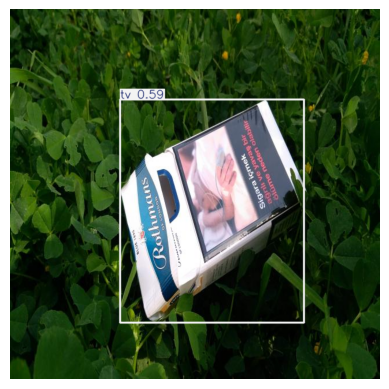

True

In [10]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Step 1: Set the path to the test image
image_path = "/content/TACO:-Trash-Annotations-in-Context-Dataset-16/test/images/000004_jpg.rf.f220eaab0f36226385a34eb0708f9936.jpg"  # Replace with your actual image path

# Step 2: Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Ensure that this is the path to your trained YOLOv8 model

# Step 3: Load the test image using OpenCV
img = cv2.imread(image_path)

# Step 4: Make predictions on the test image
results = model.predict(img, conf=0.5)  # Adjust confidence threshold as needed

# Step 5: Annotate the image with bounding boxes and category labels
annotated_img = results[0].plot()

# Step 6: Convert to RGB format for display using matplotlib
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Step 7: Display the image with bounding boxes and category labels
plt.imshow(annotated_img_rgb)
plt.axis('off')  # Hide axis for cleaner view
plt.show()

# Optional: Save the annotated image
cv2.imwrite("annotated_test_image.jpg", annotated_img)



0: 640x640 1 car, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


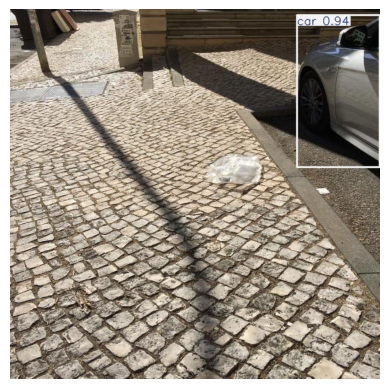

True

In [9]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Step 1: Set the path to the test image
image_path = "/content/TACO:-Trash-Annotations-in-Context-Dataset-16/test/images/000006_jpg.rf.65db7183891046d795545fe4380c669e.jpg"  # Replace with your actual image path

# Step 2: Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Ensure that this is the path to your trained YOLOv8 model

# Step 3: Load the test image using OpenCV
img = cv2.imread(image_path)

# Step 4: Make predictions on the test image
results = model.predict(img, conf=0.5)  # Adjust confidence threshold as needed

# Step 5: Annotate the image with bounding boxes and category labels
annotated_img = results[0].plot()

# Step 6: Convert to RGB format for display using matplotlib
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Step 7: Display the image with bounding boxes and category labels
plt.imshow(annotated_img_rgb)
plt.axis('off')  # Hide axis for cleaner view
plt.show()

# Optional: Save the annotated image
cv2.imwrite("annotated_test_image.jpg", annotated_img)



0: 640x640 (no detections), 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


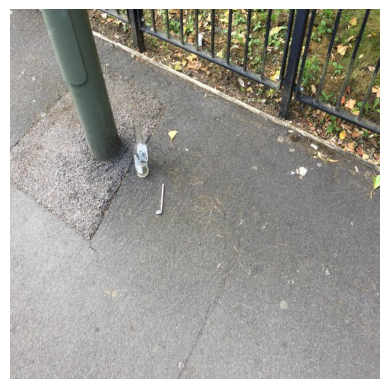

True

In [8]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Step 1: Set the path to the test image
image_path = "/content/TACO:-Trash-Annotations-in-Context-Dataset-16/test/images/000074_JPG.rf.1394c939daf3a1345ce94470279bca71.jpg"  # Replace with your actual image path

# Step 2: Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Ensure that this is the path to your trained YOLOv8 model

# Step 3: Load the test image using OpenCV
img = cv2.imread(image_path)

# Step 4: Make predictions on the test image
results = model.predict(img, conf=0.5)  # Adjust confidence threshold as needed

# Step 5: Annotate the image with bounding boxes and category labels
annotated_img = results[0].plot()

# Step 6: Convert to RGB format for display using matplotlib
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Step 7: Display the image with bounding boxes and category labels
plt.imshow(annotated_img_rgb)
plt.axis('off')  # Hide axis for cleaner view
plt.show()

# Optional: Save the annotated image
cv2.imwrite("annotated_test_image.jpg", annotated_img)


In [ ]:
# # You can upload a test image manually in Colab using the file upload widget:
# from google.colab import files
# uploaded = files.upload()

# # Load the test image (the uploaded image's file name will be the key)
# image_path = list(uploaded.keys())[0]

# # Read the image using OpenCV
# img = cv2.imread(image_path)
